In [29]:
# !pip install pandas
# !pip install numpy
# !pip install matplotlib
#!pip install sklearn

#Importing the packages needed for visuals and analysis

import pandas as pd
import seaborn as sns
import numpy as np
import sklearn as sk

In [30]:
#Importing the data from csv files for the QB, RB, and WR positions

qbdata = pd.read_csv(r'qb_stats_and_projections.csv')
qbdf = pd.DataFrame(qbdata)

rbdata = pd.read_csv(r'rb_stats_and_projections.csv')
rbdf = pd.DataFrame(rbdata)

wrdata = pd.read_csv(r'wr_stats_and_projections.csv')
wrdf = pd.DataFrame(wrdata)

rbdf




,Unnamed: 0,PLAYER NAME,TEAM NAME,PLAYER POSITION,2019 CAR,2019 RUSH YDS,2019 RUSH AVG,2019 RUSH TD,2019 REC,2019 REC YDS,...,2019 FPTS,2020 CAR,2020 RUSH YARDS,2020 RUSH AVG,2020 RUSH TD,2020 REC,2020 REC YDS,2020 REC TD,2020 FPTS,Player OUTLOOK
0,1,Christian McCaffrey,Panthers,RB,287.0,1387.0,4.8,15.0,116.0,1005.0,...,471.20,233.0,1048.0,4.5,9.0,90.0,736.0,3.0,333.95,McCaffrey returns as the feature back in Carol...
1,2,Ezekiel Elliott,Cowboys,RB,301.0,1357.0,4.5,12.0,54.0,420.0,...,311.70,282.0,1244.0,4.4,10.0,57.0,455.0,2.0,300.76,Elliott returns as the clear feature back in D...
2,3,Saquon Barkley,Giants,RB,217.0,1003.0,4.6,6.0,52.0,438.0,...,244.10,261.0,1176.0,4.5,10.0,57.0,458.0,3.0,292.33,Barkley's 2019 season fell short of lofty expe...
3,4,Dalvin Cook,Vikings,RB,250.0,1135.0,4.5,13.0,53.0,519.0,...,292.40,245.0,1051.0,4.3,10.0,64.0,536.0,1.0,291.72,Cook's career has thus far been marred by inju...
4,5,Alvin Kamara,Saints,RB,171.0,797.0,4.7,5.0,81.0,533.0,...,248.52,194.0,876.0,4.5,8.0,78.0,600.0,3.0,290.39,Kamara is coming off an up-and-down 2019 campa...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250,251,Marshawn Lynch,FA,RB,12.0,34.0,2.8,1.0,0.0,0.0,...,9.40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,No outlook available.
251,252,Darren Sproles,Eagles,RB,17.0,66.0,3.9,0.0,6.0,24.0,...,17.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,No outlook available.
252,253,LeSean McCoy,FA,RB,101.0,465.0,4.6,4.0,28.0,181.0,...,118.60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,No outlook available.
253,254,Alex Barnes,Titans,RB,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,No outlook available.


In [31]:
    #Drops unnecessary columns that are categorical and don't relate to the question being solved   
    
    qbclean = qbdf.drop(['Unnamed: 0', 'TEAM NAME', 'PLAYER POSITION', '2020 OUTLOOK'], axis=1)
    #print(qbclean)
    
    
    rbclean = rbdf.drop(['Unnamed: 0', 'TEAM NAME', 'PLAYER POSITION', 'Player OUTLOOK'], axis=1)
    #print(rbclean)
    
    
    wrclean = wrdf.drop(['Unnamed: 0', 'TEAM', 'POSITION', '2020 PLAYER OUTLOOK'], axis=1)
    #print(wrclean)

In [32]:
    #Drops rows that have Null values
    qbclean = qbclean.dropna()
    print(qbclean)
    
    rbclean = rbclean.dropna()
    #print(rbclean)
    
    wrclean = wrclean.dropna()
    #wrclean

           PLAYER NAME  2019 COMPLETED PASS  2019 ATTEMPTED PASS  \
0        Lamar Jackson                265.0                401.0   
1      Patrick Mahomes                319.0                484.0   
2       Deshaun Watson                333.0                495.0   
3         Dak Prescott                388.0                596.0   
4       Russell Wilson                341.0                516.0   
5         Kyler Murray                349.0                542.0   
6            Tom Brady                373.0                613.0   
7            Matt Ryan                408.0                616.0   
8     Matthew Stafford                187.0                291.0   
9         Carson Wentz                388.0                607.0   
10          Drew Brees                281.0                378.0   
11          Josh Allen                271.0                461.0   
12       Aaron Rodgers                353.0                569.0   
13        Daniel Jones                284.0     

In [33]:
    #Removes rows that are all zeros
    
    qbclean = qbclean.loc[~(qbclean==0).any(axis=1)]
    #print(qbclean)
    qbclean = qbclean.drop([10,24,32,34])
    #print(qbclean)
    
    rbclean = rbclean.loc[~(rbclean==0).any(axis=1)]
    rbclean = rbclean.drop([13,14,17,29,32,34,41,42,46,48,50,52,60,61])
    #print(rbclean)
    
    wrclean = wrclean.loc[~(wrclean==0).all(axis=1)]
    #wrclean

In [34]:
    #Gives descriptive statistics of the data
    
    qbcleandes = qbclean.describe()
    
    
    rbcleandes = rbclean.describe()
    #print(rbcleandes)
    
    wrcleandes = wrclean.describe()
    #print(wrcleandes)
    
    qbcleandes

,2019 COMPLETED PASS,2019 ATTEMPTED PASS,2019 PASSING YDS,2019 PASSING TD,2019 INT,2019 CAR,2019 RUSH YDS,2019 RUSH TD,2019 FPTS,2020 COMPLETED PASS,2020 ATTEMPTED PASS,2020 PASSING YDS,2020 PASSING TD,2020 INT,2020 CAR,2020 RUSH YDS,2020 RUSH TD,2020 FPTS
count,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000
mean,332.277778,513.222222,3848.111111,25.333333,9.722222,58.388889,276.055556,3.111111,277.841111,332.222222,516.277778,3872.166667,25.388889,10.888889,57.722222,268.611111,2.555556,271.833889
std,53.096810,87.621214,566.300885,4.115966,4.508887,37.874621,278.010256,2.348689,49.042201,28.690141,45.431015,378.072861,3.632191,1.906302,32.889844,224.477731,1.381484,36.855447
min,201.000000,286.000000,2742.000000,20.000000,4.000000,26.000000,34.000000,1.000000,214.980000,291.000000,447.000000,3389.000000,18.000000,8.000000,24.000000,27.000000,1.000000,208.420000
25%,309.500000,464.750000,3632.750000,22.000000,6.000000,33.250000,96.750000,1.250000,245.145000,307.250000,475.500000,3665.000000,23.500000,9.000000,33.000000,101.000000,2.000000,239.947500
50%,337.000000,514.500000,3990.000000,26.000000,8.500000,45.500000,201.500000,2.500000,271.600000,336.000000,522.000000,3770.000000,25.500000,11.000000,50.500000,209.500000,2.000000,267.320000
75%,370.000000,589.250000,4056.250000,26.750000,12.000000,71.750000,326.250000,3.750000,288.180000,349.750000,543.750000,4214.500000,27.000000,12.000000,70.000000,367.750000,3.000000,293.955000
max,408.000000,626.000000,4902.000000,36.000000,21.000000,176.000000,1206.000000,9.000000,415.680000,390.000000,600.000000,4533.000000,32.000000,15.000000,156.000000,902.000000,6.000000,338.230000


In [35]:
## seperating 2019 and 2020 data

qbclean2019 = qbclean.loc[:, qbclean.columns.str.contains('2019')]
qbclean2020 = qbclean.loc[:, qbclean.columns.str.contains('2020')]

rbclean2019 = rbclean.loc[:, rbclean.columns.str.contains('2019')]
rbclean2020 = rbclean.loc[:, rbclean.columns.str.contains('2020')]

wrclean2019 = wrclean.loc[:, wrclean.columns.str.contains('2019')]
wrclean2020 = wrclean.loc[:, wrclean.columns.str.contains('2020')]

In [36]:
wrclean2020

,2020 TAR,2020 REC,2020 REC YARDS,2020 AVG REC YARDS,2020 REC TDS,2020 RUSH CAR,2020 RUSH YARDS,2020 RUSH TDS,2020 FPTS
0,152.0,114.0,1351.0,11.9,9.0,0.0,0.0,0.0,301.44
1,141.0,92.0,1140.0,12.3,8.0,4.0,23.0,0.0,255.30
2,139.0,89.0,1245.0,14.0,7.0,2.0,10.0,0.0,253.95
3,131.0,88.0,1191.0,13.6,8.0,0.0,0.0,0.0,251.83
4,137.0,90.0,1149.0,12.7,7.0,0.0,0.0,0.0,249.39
...,...,...,...,...,...,...,...,...,...
195,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.45
196,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.29
197,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.19
198,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.12


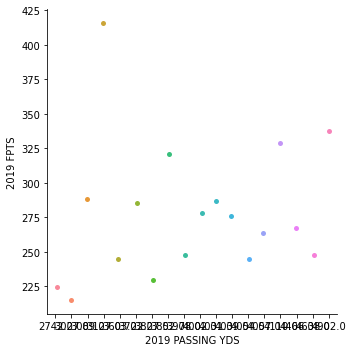

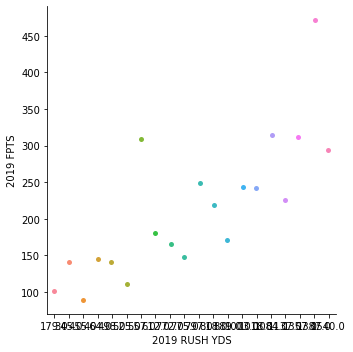

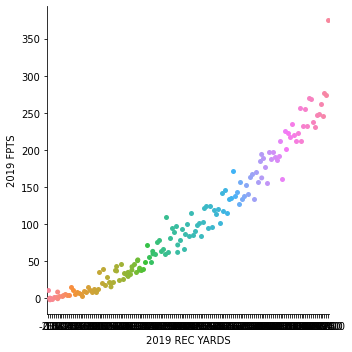

In [37]:
    #Scatterplot that does work
    
    sns.catplot(x='2019 PASSING YDS', y='2019 FPTS', data=qbclean)
    
    sns.catplot(x='2019 RUSH YDS', y='2019 FPTS', data=rbclean)
    
    sns.catplot(x='2019 REC YARDS', y='2019 FPTS', data=wrclean)


In [38]:
    #Logistic Regression
    
    class sklearn.linear_model.LogisticRegression(penalty='l2', *, dual=False, tol=0.0001, C=1.0, fit_intercept=True,
    intercept_scaling=1, class_weight=None, random_state=None, solver='lbfgs', max_iter=100, multi_class='auto', 
    verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)
    
    

SyntaxError: invalid syntax (3513896706.py, line 3)

In [ ]:
    #QDA

    class sklearn.linear_model.LogisticRegression(penalty='l2', *, dual=False, tol=0.0001, C=1.0, fit_intercept=True,
    intercept_scaling=1, class_weight=None, random_state=None, solver='lbfgs', max_iter=100, multi_class='auto', 
    verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)
    

In [ ]:
    #QDA

    class sklearn.linear_model.LogisticRegression(penalty='l2', *, dual=False, tol=0.0001, C=1.0, fit_intercept=True,
    intercept_scaling=1, class_weight=None, random_state=None, solver='lbfgs', max_iter=100, multi_class='auto', 
    verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)
    

In [ ]:
    #Support Vector Machines
    
    class sklearn.linear_model.LogisticRegression(penalty='l2', *, dual=False, tol=0.0001, C=1.0, fit_intercept=True,
    intercept_scaling=1, class_weight=None, random_state=None, solver='lbfgs', max_iter=100, multi_class='auto', 
    verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)
    